# Do-Calculus (p213)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Authors: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

**This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 7 page 213**

In [1]:
from IPython.display import display, Math, Latex,HTML

import pyagrum as gum
import pyagrum.lib.notebook as gnb

import pyagrum.causal as csl
import pyagrum.causal.notebook as cslnb

import os

### the causal diagram
The corresponding causal diagram is the following:<br>
> We're facing the following situation and we want to measure the causal effect of $X$ on $Y$:

In [2]:
fd = gum.fastBN("w->z->x->y;w->x;w->y")
fd

(pyagrum.BayesNet@0x15456b800) BN{nodes: 4, arcs: 5, domainSize: 16, dim: 11, mem: 176o}

> We suspect the presence of some <b>unmeasured</b> confounders, that could explain the correlation between $W$ and $X$ and between $W$ and $Y$:

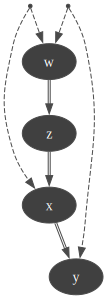

In [3]:
fdModele = csl.CausalModel(fd, [("u1", ["w","x"]),("u2", ["w","y"])],False) 
#(<latent variable name>, <list of affected variables’ ids>).
gnb.show(fdModele)

### Even with two umeasured confounders :

> * We can measure the causal effect of $Z$ on $Y$ using the back-door adjustment:

In [4]:
print(" + Back-door doing Z on Y :"+str(fdModele.backDoor("z","y")))

 + Back-door doing Z on Y :{'w'}


> * We can measure the causal effect of $W$ on $X$ using the front-door formula:

In [5]:
print(" + Front-door doing W on X :"+str(fdModele.frontDoor("w","x")))

 + Front-door doing W on X :{'z'}


> * In order to measure the causal effect of $X$ on $Y$, we can use neither the back-door adjustment nor the front-door formula:

In [6]:
print(" + Backdoor doing X on Y :"+str(fdModele.backDoor("x","y")))
print(" + Frontdoor doing X on Y :"+str(fdModele.frontDoor("x","y")))

 + Backdoor doing X on Y :None
 + Frontdoor doing X on Y :None


> * In this case, the only way to measure the causal effect of $X$ on $Y$ is to use the do-calculus:

In [7]:
cslnb.showCausalImpact(fdModele,on="y",doing="x")